In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import TemporalMetrics

# Same as the other document but with all datasets

In [18]:
technique_list = Parser.list_techniques()
df_tech_list = [pd.DataFrame()] * len(technique_list)

for dataset_id in Parser.list_datasets():
    for t, technique_id in enumerate(technique_list):
        history = Parser.parse_rectangles(technique_id, dataset_id)
        df_tech = pd.DataFrame()
        for i in range(1, len(history)):
            df_temp = TemporalMetrics.delta_vis(history[i - 1], history[i])
            df_temp = pd.merge(df_temp, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]))
            df_tech = pd.concat([df_tech, df_temp])
        df_tech_list[t] = pd.concat([df_tech_list[t], df_tech])
        #print(len(df_tech_list[t]))

In [19]:
def cm2inch(value):
    return value/2.54

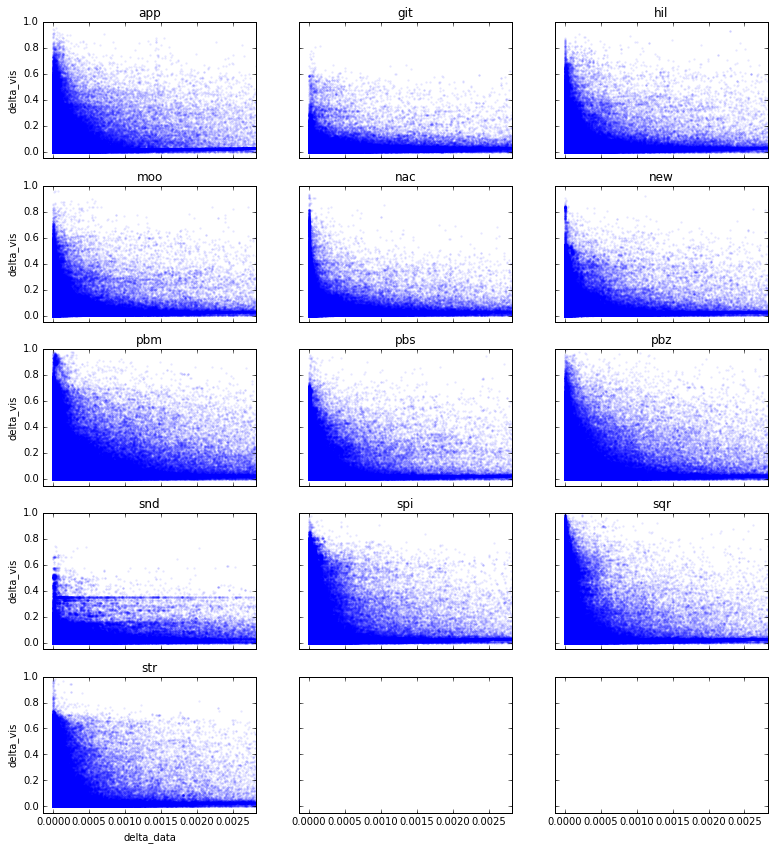

In [43]:
nrow = 5
ncol = 3
xlim = (df_tech_list[0]['delta_data']).quantile(0.99) # Remove the 0.1% outliers

fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(2*16.5), cm2inch(2*18)))
for i, ax in enumerate(fig.axes):
    if i < len(technique_list):
        ax.set_title(technique_list[i])
        df_tech_list[i].plot.scatter(x='delta_data', y='delta_vis', s=5, alpha=0.1, lw=0, ax=ax)
        ax.set_xlim([-0.05*xlim, xlim])
        ax.set_ylim([-0.05, 1])

TypeError: 'NoneType' object is not iterable

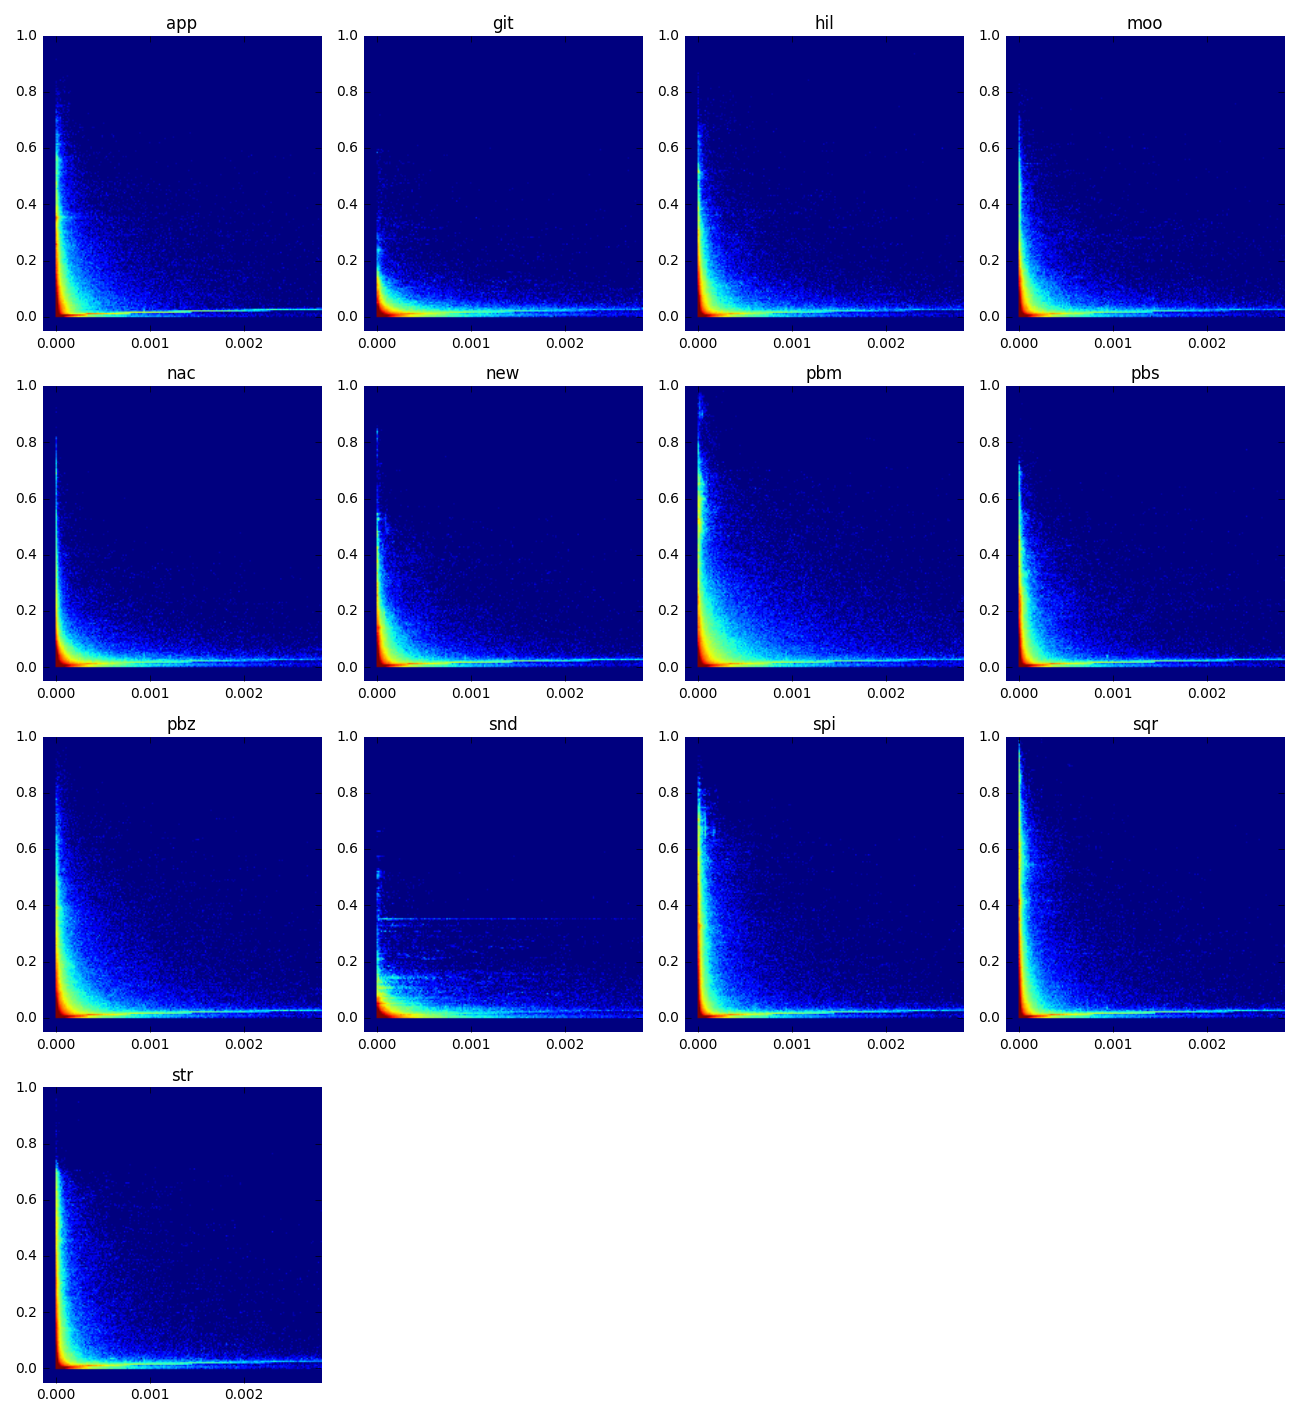

In [44]:
import mpl_scatter_density
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=1, vmax=3000, stretch=LogStretch())

xlim = (df_tech_list[0]['delta_data']).quantile(0.99) # Remove the 0.1% outliers
plt.rcParams['image.cmap'] = 'jet'

nrow = 4
ncol = 4
#fig, axs = plt.subplots(nrow, ncol, , , projection='scatter_density')
fig = plt.figure(figsize=(cm2inch(2*16.5), cm2inch(2*18)))
for i in range(len(technique_list)):
    df = df_tech_list[i]

    ax = fig.add_subplot(nrow, ncol, i+1, projection='scatter_density')        
    ax.set_title(technique_list[i])
    
    ax.scatter_density(df['delta_data'].values, df['delta_vis'].values, norm=norm)

    ax.set_xlim([-0.05*xlim, xlim])
    ax.set_ylim([-0.05, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    locator = plt.MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
    ax.xaxis.set_major_locator(locator)


plt.tight_layout()

plt.show()
fig.savefig('kde_all_jet.png')
from IPython.display import Image
Image(filename='kde_all_jet.png') 

TypeError: 'NoneType' object is not iterable

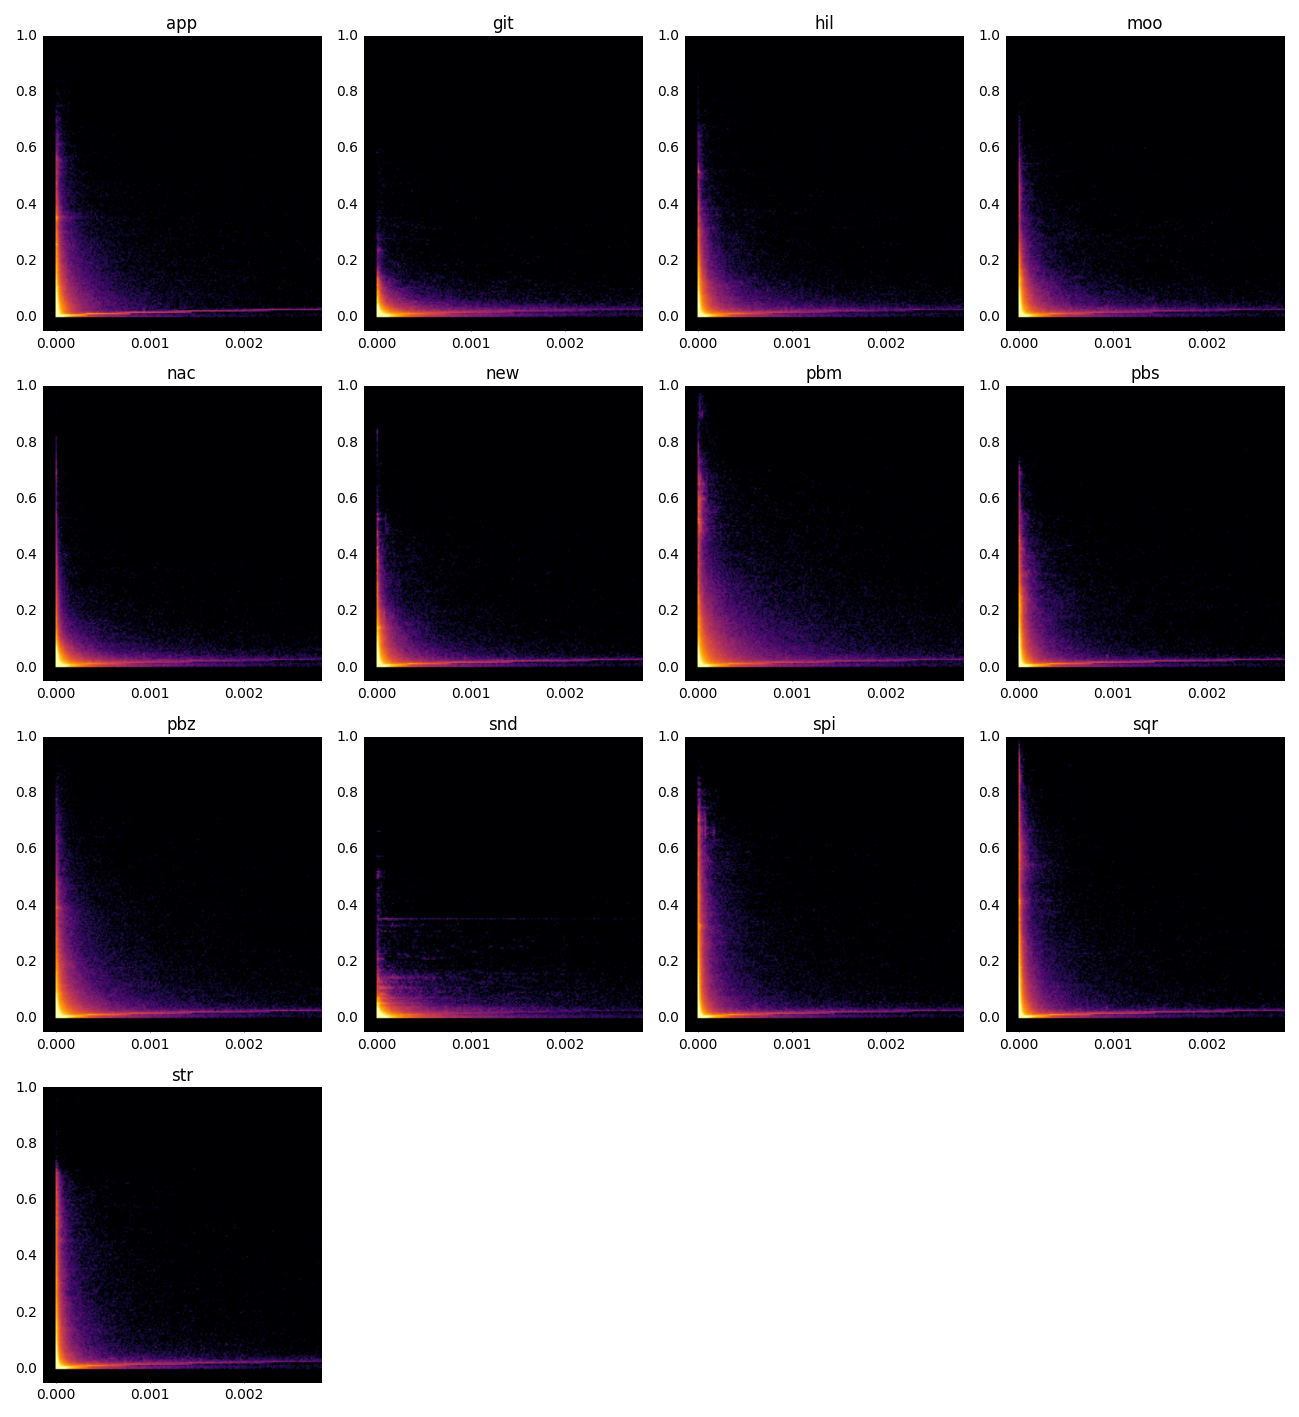

In [45]:
import mpl_scatter_density
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=1, vmax=3000, stretch=LogStretch())

xlim = (df_tech_list[0]['delta_data']).quantile(0.99) # Remove the 0.1% outliers
plt.rcParams['image.cmap'] = 'inferno'

nrow = 4
ncol = 4
#fig, axs = plt.subplots(nrow, ncol, , , projection='scatter_density')
fig = plt.figure(figsize=(cm2inch(2*16.5), cm2inch(2*18)))
for i in range(len(technique_list)):
    df = df_tech_list[i]

    ax = fig.add_subplot(nrow, ncol, i+1, projection='scatter_density')        
    ax.set_title(technique_list[i])
    
    ax.scatter_density(df['delta_data'].values, df['delta_vis'].values, norm=norm)

    ax.set_xlim([-0.05*xlim, xlim])
    ax.set_ylim([-0.05, 1])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    locator = plt.MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
    ax.xaxis.set_major_locator(locator)


plt.tight_layout()

plt.show()
fig.savefig('kde_all_inferno.png')
from IPython.display import Image
Image(filename='kde_all_inferno.png') 